In [100]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# All timing are in micro seconds (us)

In [101]:
core_selected = [1, 2, 4, 8, 16, 32, 64, 72]#, 81, 96]

In [ ]:
df = pd.read_csv("./results/grid/grid_size_power.csv")
pd.options.display.max_rows = 10
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
time_cols = ["conversion_in0",	"conversion_in1",	"transfer_in0",	"transfer_in1",	"tilization_in0",	"tilization_in1",	"first_run", "second_run", "compile_time", "inference_avg"]
df.sort_values(["grid_size", "m"], inplace=True)
df.reset_index(inplace=True, drop = True)
df


,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,...,transfer_in1,tilization_in0,tilization_in1,inference_avg,voltage,current,power,aiclk,temp,iters
0,f16_m4,256,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1249.100174,493.856207,...,296.030360,360.340354,397.208565,768.265295,0.760000,36.000,27.00,1000.000,54.621458,100
1,f16_m4,512,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,270.881659,232.500004,...,362.204027,277.772721,273.641926,661.523927,0.760000,36.000,27.00,1000.000,54.485000,100
2,f16_m4,1024,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,277.311137,196.747261,...,910.352344,343.192408,314.701593,3100.015099,0.760000,36.000,27.00,1000.000,54.586875,100
3,f16_m4,2048,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1768.305300,227.662658,...,3387.791933,706.261341,663.074531,22301.635695,0.759970,37.150,27.21,1000.000,54.419375,100
4,f16_m4,3072,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,3948.615979,351.810730,...,7601.801314,1490.095052,1394.731587,73300.985563,0.759955,38.660,28.66,1000.000,54.176875,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,f16_m4,3072,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,2685.764961,365.232477,...,7940.457796,1617.987488,1528.649937,2001.082742,0.759950,42.320,33.01,1000.000,49.844062,100
68,f16_m4,4096,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1612.493729,370.500701,...,13549.201995,2262.311059,2164.057031,3800.142245,0.759990,42.390,32.92,1000.000,50.051250,100
69,f16_m4,5120,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1123.726254,286.308130,...,20608.608398,3032.372327,3020.855758,7220.499555,0.760035,42.925,33.06,1000.000,50.183125,100
70,f16_m4,6144,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,810.195820,308.064124,...,29676.594233,4513.755879,4488.853632,10425.580003,0.760015,43.040,33.38,999.715,50.320625,100


In [137]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [138]:
import re
pattern = r"\((\d+), (\d+)\)"

df_inf = pd.DataFrame()
for g in df['grid_size'].unique():
    match = re.match(pattern, str(g))
    num1, num2 = match.groups()
    cores = int(num1) * int(num2)
    if cores in core_selected:
        val = df.loc[(df['grid_size'] == g)]['inference_avg'].values
        df_inf[cores] = val

df_inf.index = unq_m    
df_inf  = df_inf.reindex(sorted(df_inf.columns), axis=1)
df_inf

,1,2,4,8,16,32,64,72
256,768.265295,765.971957,410.832525,481.642962,623.119009,829.972735,583.296258,369.696848
512,661.523927,1010.714874,404.858671,348.925920,326.945498,946.640708,314.852343,296.797931
1024,3100.015099,2021.598305,1036.988470,720.602884,552.058291,716.732924,435.595927,462.699084
2048,22301.635695,11338.217051,5998.032202,3315.467072,2053.892804,1564.610053,1169.210432,1132.160873
3072,73300.985563,37131.911181,19225.938475,10117.207842,5768.685985,3431.700529,2440.772349,2001.082742
4096,171923.223408,86844.346608,44529.468101,23051.528965,12718.096192,7174.022649,4459.479407,3800.142245
5120,333757.360059,168539.973864,85896.846980,44052.067514,23689.075748,13029.021873,7816.321982,7220.499555
6144,575340.215046,290208.878699,147568.439329,75353.714244,39990.064738,21627.503820,12770.564517,10425.580003
7168,910500.039071,459691.362207,232906.565453,118703.337465,64530.552756,34670.263888,19139.004242,15726.199723


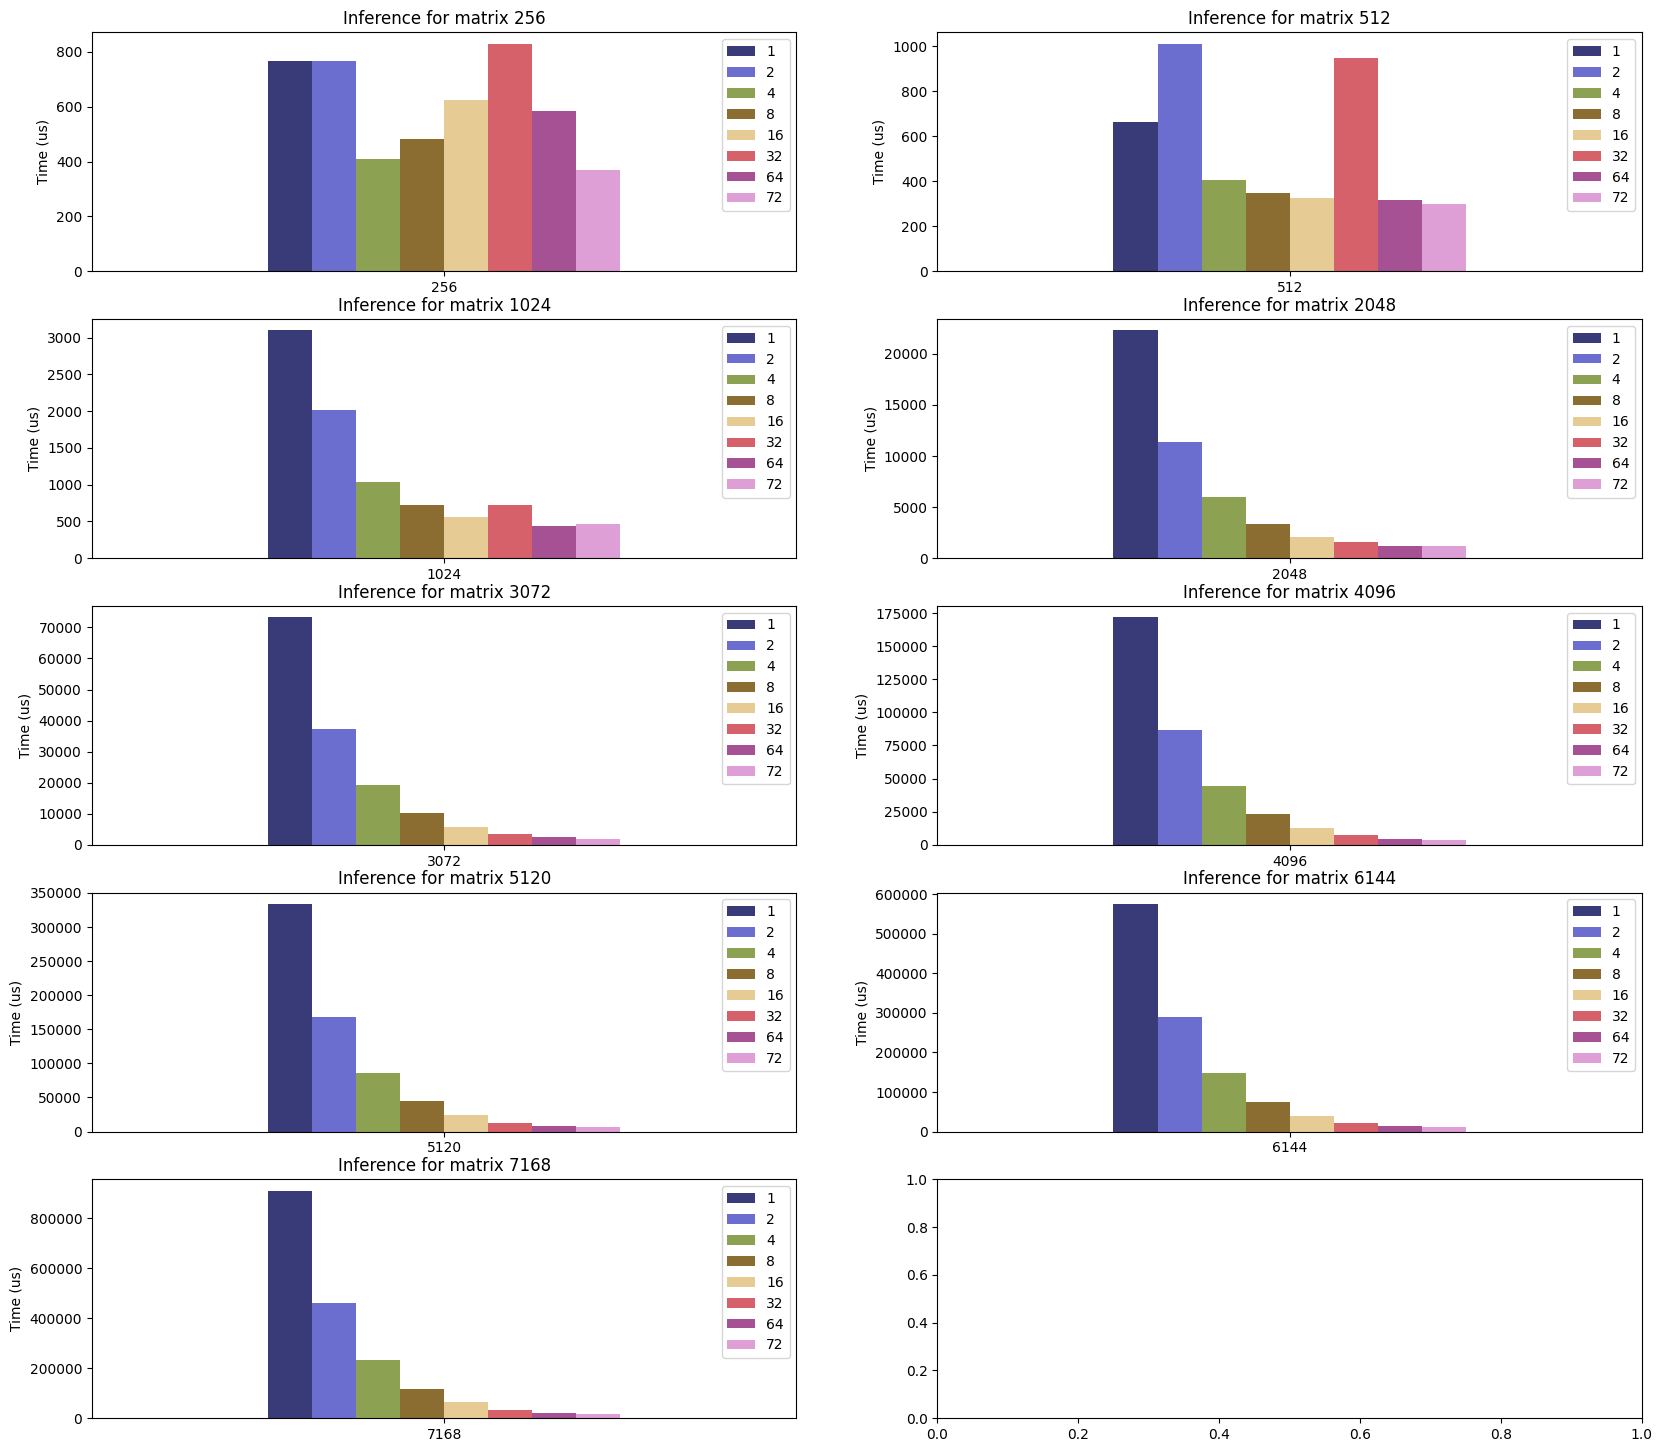

In [139]:
n_rows = int(np.ceil(len(unq_m) / 2))
fig, axs = plt.subplots(n_rows, 2, figsize=(20,18))
i, j = 0, 0
for m in unq_m:
    plot = df_inf.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"Inference for matrix {m}")
    plot.set_ylabel("Time (us)")
    if j < 1:
        j += 1
    else:
        j = 0
        i += 1

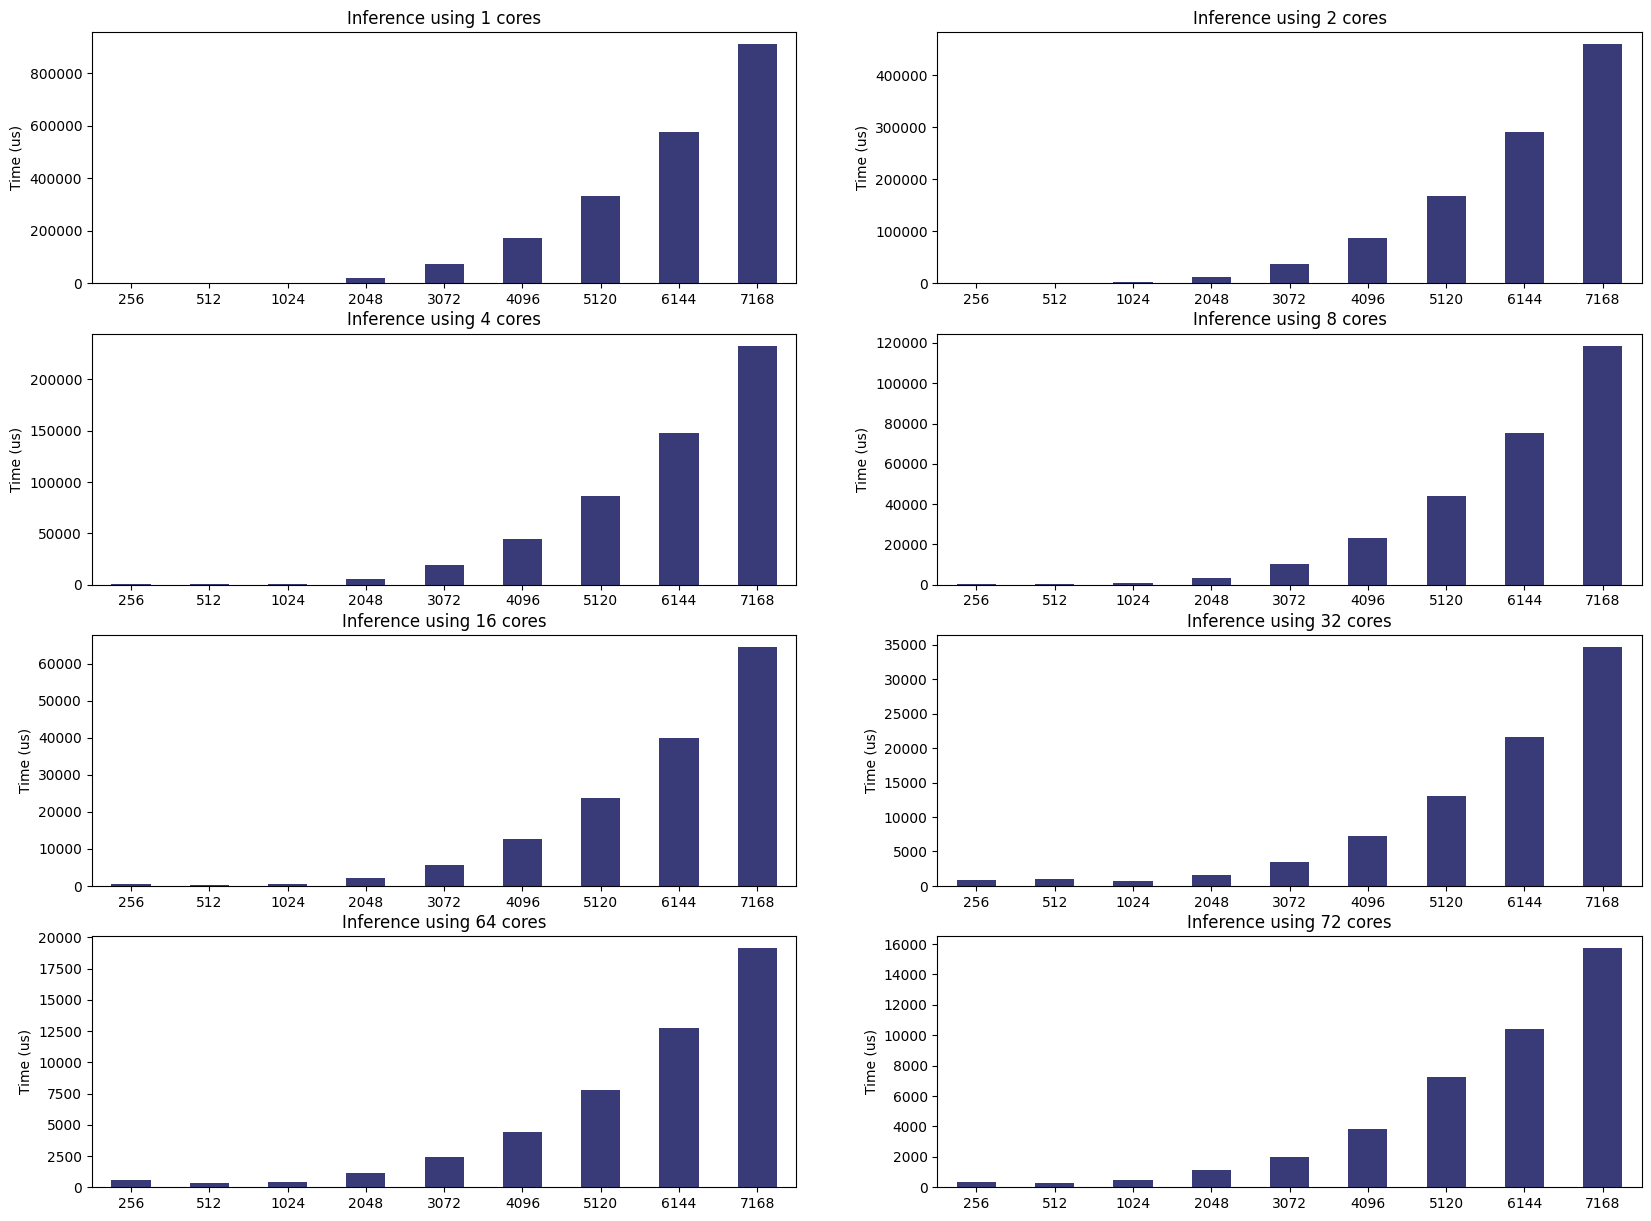

In [140]:
n_rows = int(np.ceil(len(df_inf.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
i, j = 0, 0
for g in df_inf.columns:
    plot = df_inf[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Time (us)")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## Speedup: 1 core vs 64

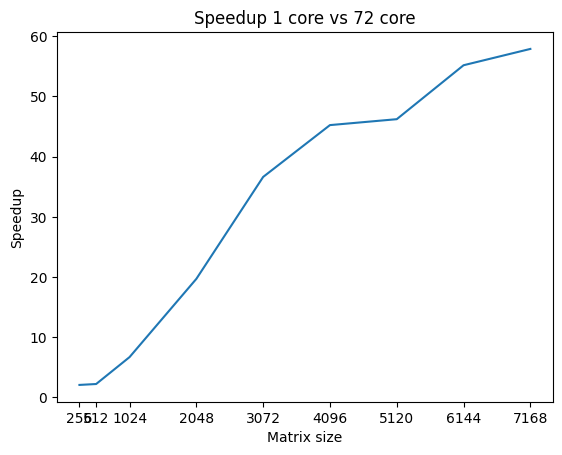

In [141]:
df_su = df_inf[df_inf.columns[0]] / df_inf[df_inf.columns[-1]]
plot = df_su.plot(kind="line")
plot.set_title(f"Speedup {df_inf.columns[0]} core vs {df_inf.columns[-1]} core")
plot.set_ylabel("Speedup")
plot.set_xlabel("Matrix size")
plot.set_xticks(df_su.index)
# plot.set_ylim([0, 5])
plt.show()

## GFLOPS

In [142]:
df_inf

,1,2,4,8,16,32,64,72
256,768.265295,765.971957,410.832525,481.642962,623.119009,829.972735,583.296258,369.696848
512,661.523927,1010.714874,404.858671,348.925920,326.945498,946.640708,314.852343,296.797931
1024,3100.015099,2021.598305,1036.988470,720.602884,552.058291,716.732924,435.595927,462.699084
2048,22301.635695,11338.217051,5998.032202,3315.467072,2053.892804,1564.610053,1169.210432,1132.160873
3072,73300.985563,37131.911181,19225.938475,10117.207842,5768.685985,3431.700529,2440.772349,2001.082742
4096,171923.223408,86844.346608,44529.468101,23051.528965,12718.096192,7174.022649,4459.479407,3800.142245
5120,333757.360059,168539.973864,85896.846980,44052.067514,23689.075748,13029.021873,7816.321982,7220.499555
6144,575340.215046,290208.878699,147568.439329,75353.714244,39990.064738,21627.503820,12770.564517,10425.580003
7168,910500.039071,459691.362207,232906.565453,118703.337465,64530.552756,34670.263888,19139.004242,15726.199723


In [143]:
n_flop = 2 * np.power(df_inf.index, 3)
df_inf_flops = pd.DataFrame()
for conf in df_inf.columns:
    df_inf_flops[conf] = n_flop/ 1e9 / (df_inf[conf] / 1e6)
df_inf_flops

,1,2,4,8,16,32,64,72
256,43.675580,43.806345,81.674235,69.666609,53.849155,40.428355,57.525540,90.762018
512,405.783442,265.589696,663.034968,769.319334,821.040381,283.566356,852.575698,904.438434
1024,692.733287,1062.270206,2070.884789,2980.120807,3889.958149,2996.211805,4929.990193,4641.210074
2048,770.341217,1515.217878,2864.250909,5181.734220,8364.540326,10980.288126,14693.564740,15174.406385
3072,791.013355,1561.515598,3015.824615,5731.033641,10051.172597,16896.013508,23755.619209,28975.342840
4096,799.420525,1582.589528,3086.471933,5962.248911,10806.566596,19157.864451,30819.506254,36166.791827
5120,804.283255,1592.710915,3125.090914,6093.594947,11331.613730,20602.886281,34342.937334,37176.853757
6144,806.229872,1598.353813,3143.331122,6155.721355,11599.292749,21447.526808,36322.315067,44492.149869
7168,808.991609,1602.350951,3162.585348,6205.275327,11414.544891,21245.494226,38486.165840,46838.200215


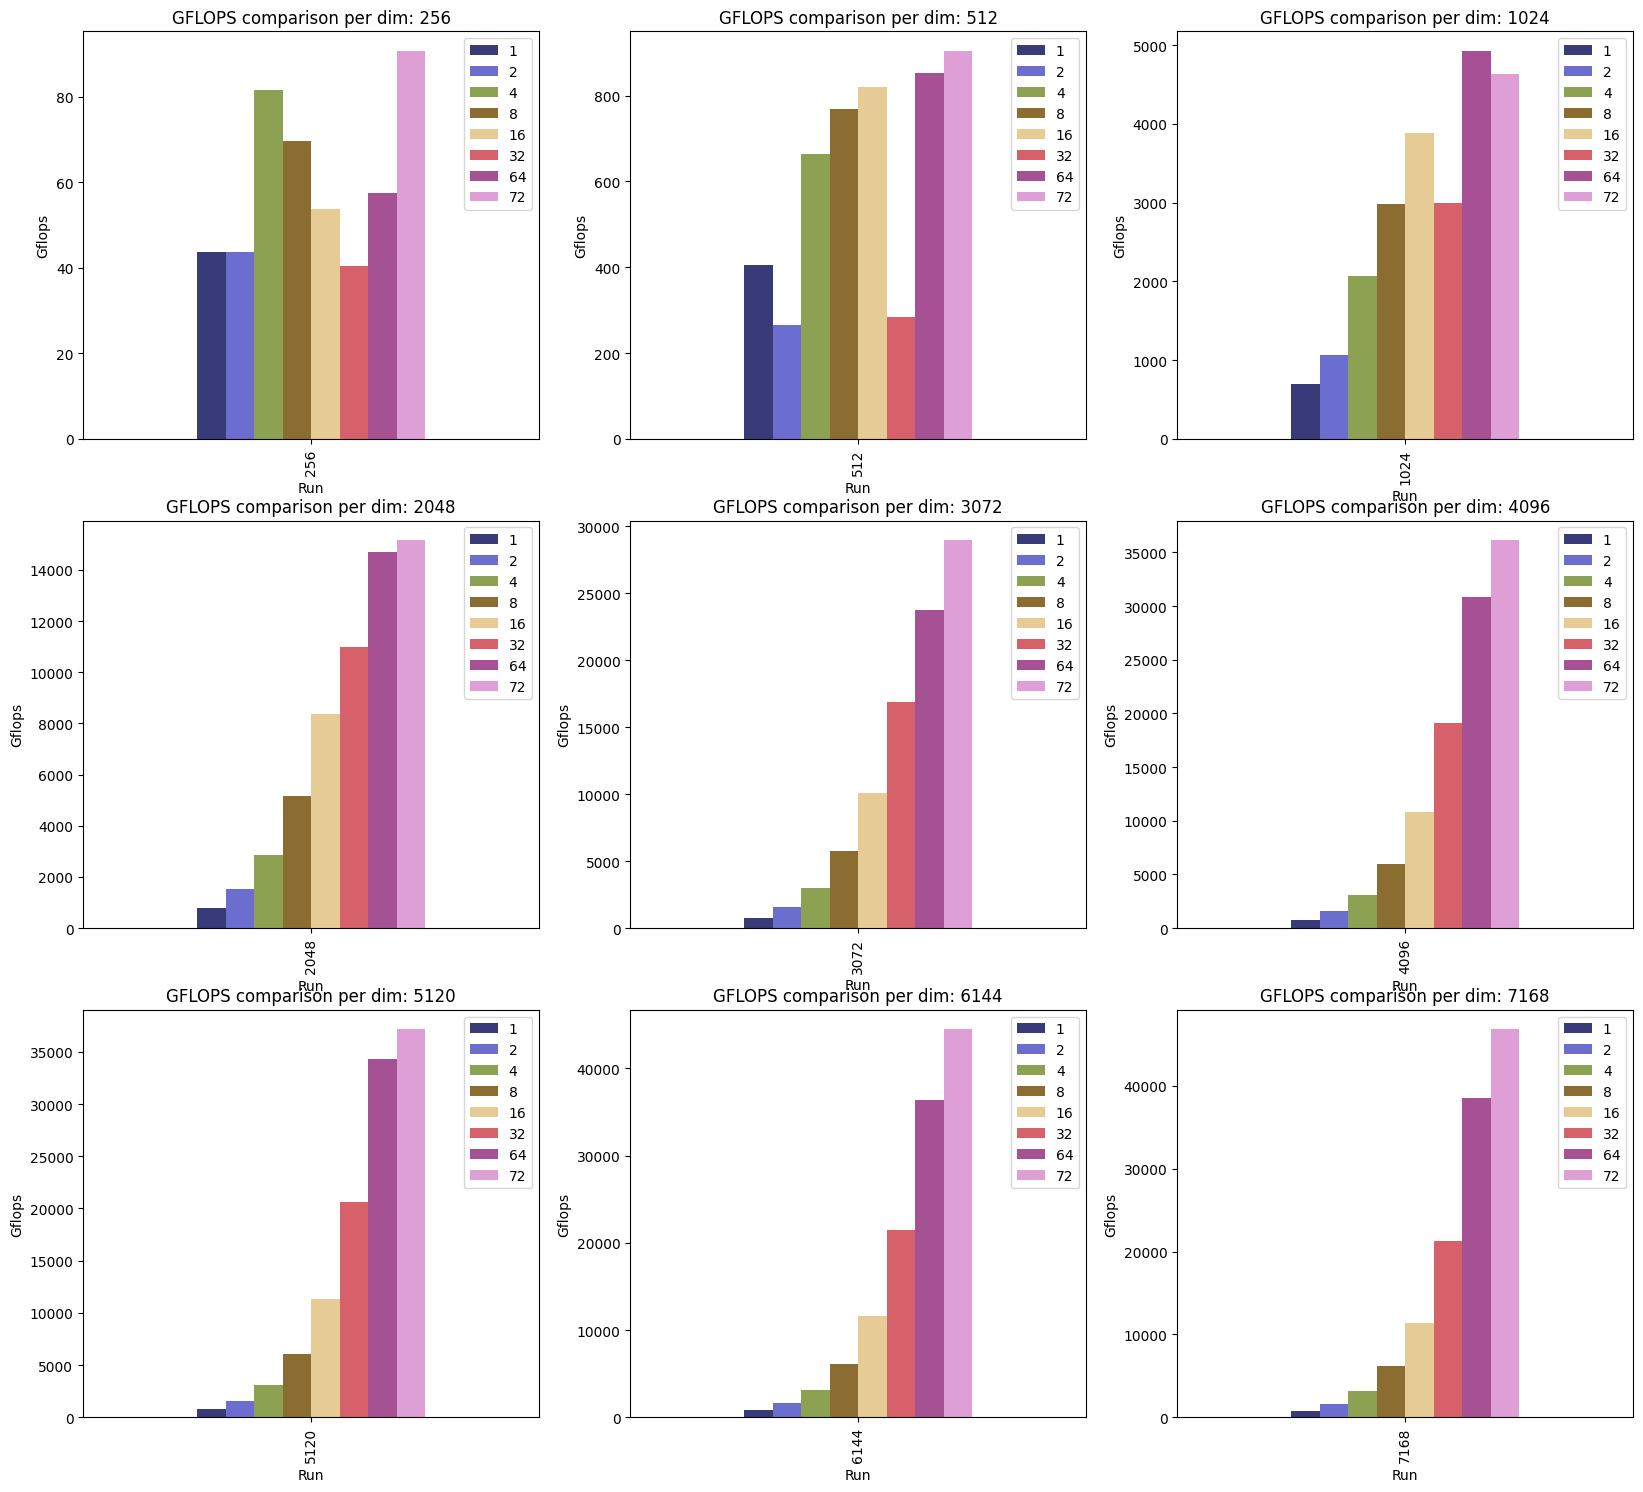

In [144]:
n_rows = int(np.ceil(len(unq_m) / 3))

if n_rows == 1:
    n_rows = 2

n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,18))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    plot = df_inf_flops.loc[[m]] .plot(kind='bar', ax=axs[i][j], colormap="tab20b")

    #  Plot the diagonal line
    # ax = axs[i][j]
    # lims = [df_combined.index[0], df_combined.index[-2]], [df_combined[m].values[0], df_combined[m].values[-2]]
    # ax.plot(lims[0], lims[1], 'k--', alpha=0.75, zorder=0, label="Linear scaling")
    
    # plot.set_xticks(df_combined.index)
    # plot.set_xticklabels(["Grayskull bf16", "Coffee Lake fp32", "Sapphire Rapids vf16", "Sapphire Rapids fp32"], rotation=20)
    
    if j < n_cols - 1:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'GFLOPS comparison per dim: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Gflops')
plt.show()

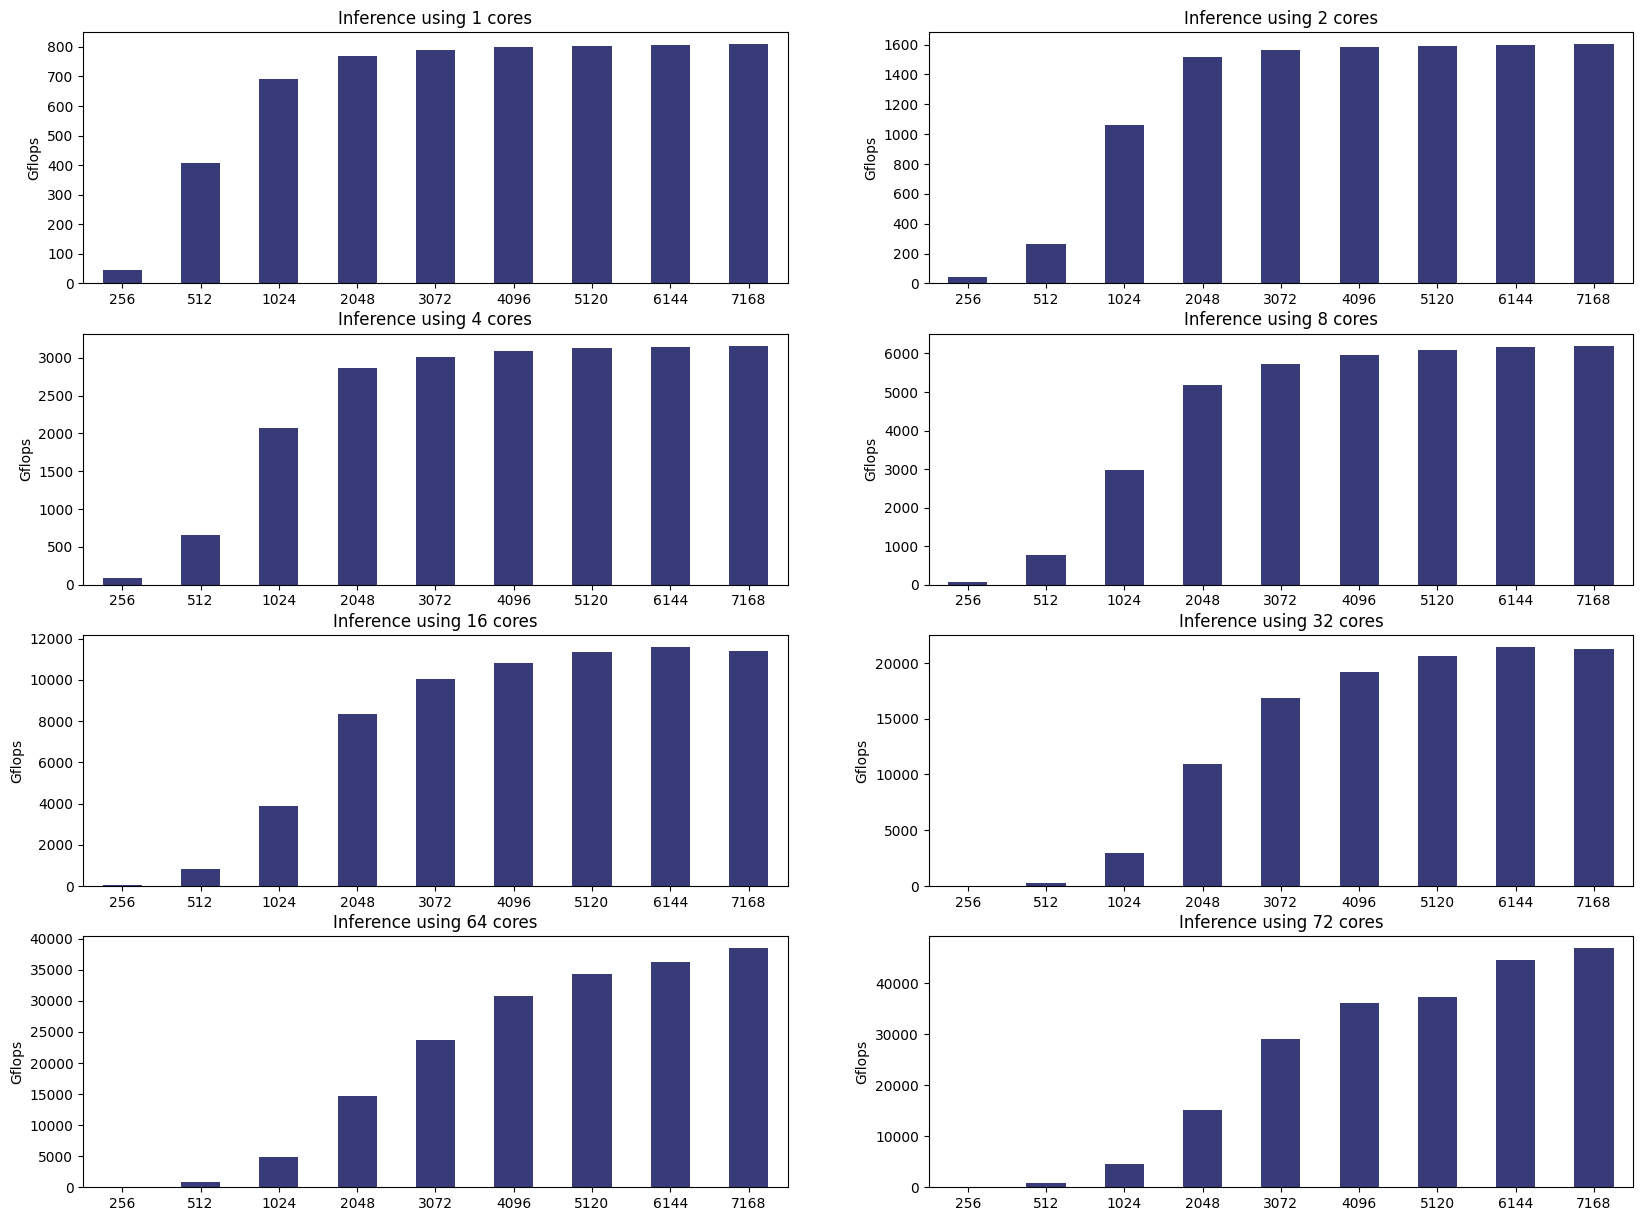

In [145]:
n_rows = int(np.ceil(len(df_inf_flops.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
i, j = 0, 0
for g in df_inf_flops.columns:
    plot = df_inf_flops[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Gflops")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## Power

In [146]:
df_pw = pd.read_csv("./results/grid_size_power.csv")
df_pw

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,...,transfer_in1,tilization_in0,tilization_in1,inference_avg,voltage,current,power,aiclk,temp,iters
0,f16_m4,256,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1249.100174,493.856207,...,296.030360,360.340354,397.208565,768.265295,0.760000,36.000,27.00,1000.000,54.621458,100
1,f16_m4,512,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,270.881659,232.500004,...,362.204027,277.772721,273.641926,661.523927,0.760000,36.000,27.00,1000.000,54.485000,100
2,f16_m4,1024,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,277.311137,196.747261,...,910.352344,343.192408,314.701593,3100.015099,0.760000,36.000,27.00,1000.000,54.586875,100
3,f16_m4,2048,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1768.305300,227.662658,...,3387.791933,706.261341,663.074531,22301.635695,0.759970,37.150,27.21,1000.000,54.419375,100
4,f16_m4,3072,"(1, 1)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,3948.615979,351.810730,...,7601.801314,1490.095052,1394.731587,73300.985563,0.759955,38.660,28.66,1000.000,54.176875,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,f16_m4,3072,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,2685.764961,365.232477,...,7940.457796,1617.987488,1528.649937,2001.082742,0.759950,42.320,33.01,1000.000,49.844062,100
68,f16_m4,4096,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1612.493729,370.500701,...,13549.201995,2262.311059,2164.057031,3800.142245,0.759990,42.390,32.92,1000.000,50.051250,100
69,f16_m4,5120,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1123.726254,286.308130,...,20608.608398,3032.372327,3020.855758,7220.499555,0.760035,42.925,33.06,1000.000,50.183125,100
70,f16_m4,6144,"(8, 9)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,810.195820,308.064124,...,29676.594233,4513.755879,4488.853632,10425.580003,0.760015,43.040,33.38,999.715,50.320625,100


In [147]:
import re
pattern = r"\((\d+), (\d+)\)"
key = "power"
df_power = pd.DataFrame()
for g in df_pw['grid_size'].unique():
    match = re.match(pattern, str(g))
    num1, num2 = match.groups()
    cores = int(num1) * int(num2)
    if cores in core_selected:
        val = df_pw.loc[(df_pw['grid_size'] == g)][key].values
        df_power[cores] = val

df_power.index = unq_m    
df_power  = df_power.reindex(sorted(df_power.columns), axis=1)
df_power

,1,2,4,8,16,32,64,72
256,27.00,26.00,26.00,26.00,26.00,26.000,25.00,26.00
512,27.00,26.00,26.00,24.00,26.00,26.000,25.76,26.00
1024,27.00,26.00,26.93,27.66,28.04,26.000,26.71,27.49
2048,27.21,26.94,27.27,28.00,31.80,31.560,31.60,32.82
3072,28.66,27.13,28.53,28.00,32.00,33.060,33.00,33.01
4096,29.99,29.00,29.00,29.00,32.00,33.170,33.00,32.92
5120,30.00,29.00,29.00,29.00,32.00,33.315,33.05,33.06
6144,30.00,29.00,29.00,29.00,32.00,33.430,33.39,33.38
7168,30.00,30.00,29.00,29.57,32.00,33.630,33.58,33.46


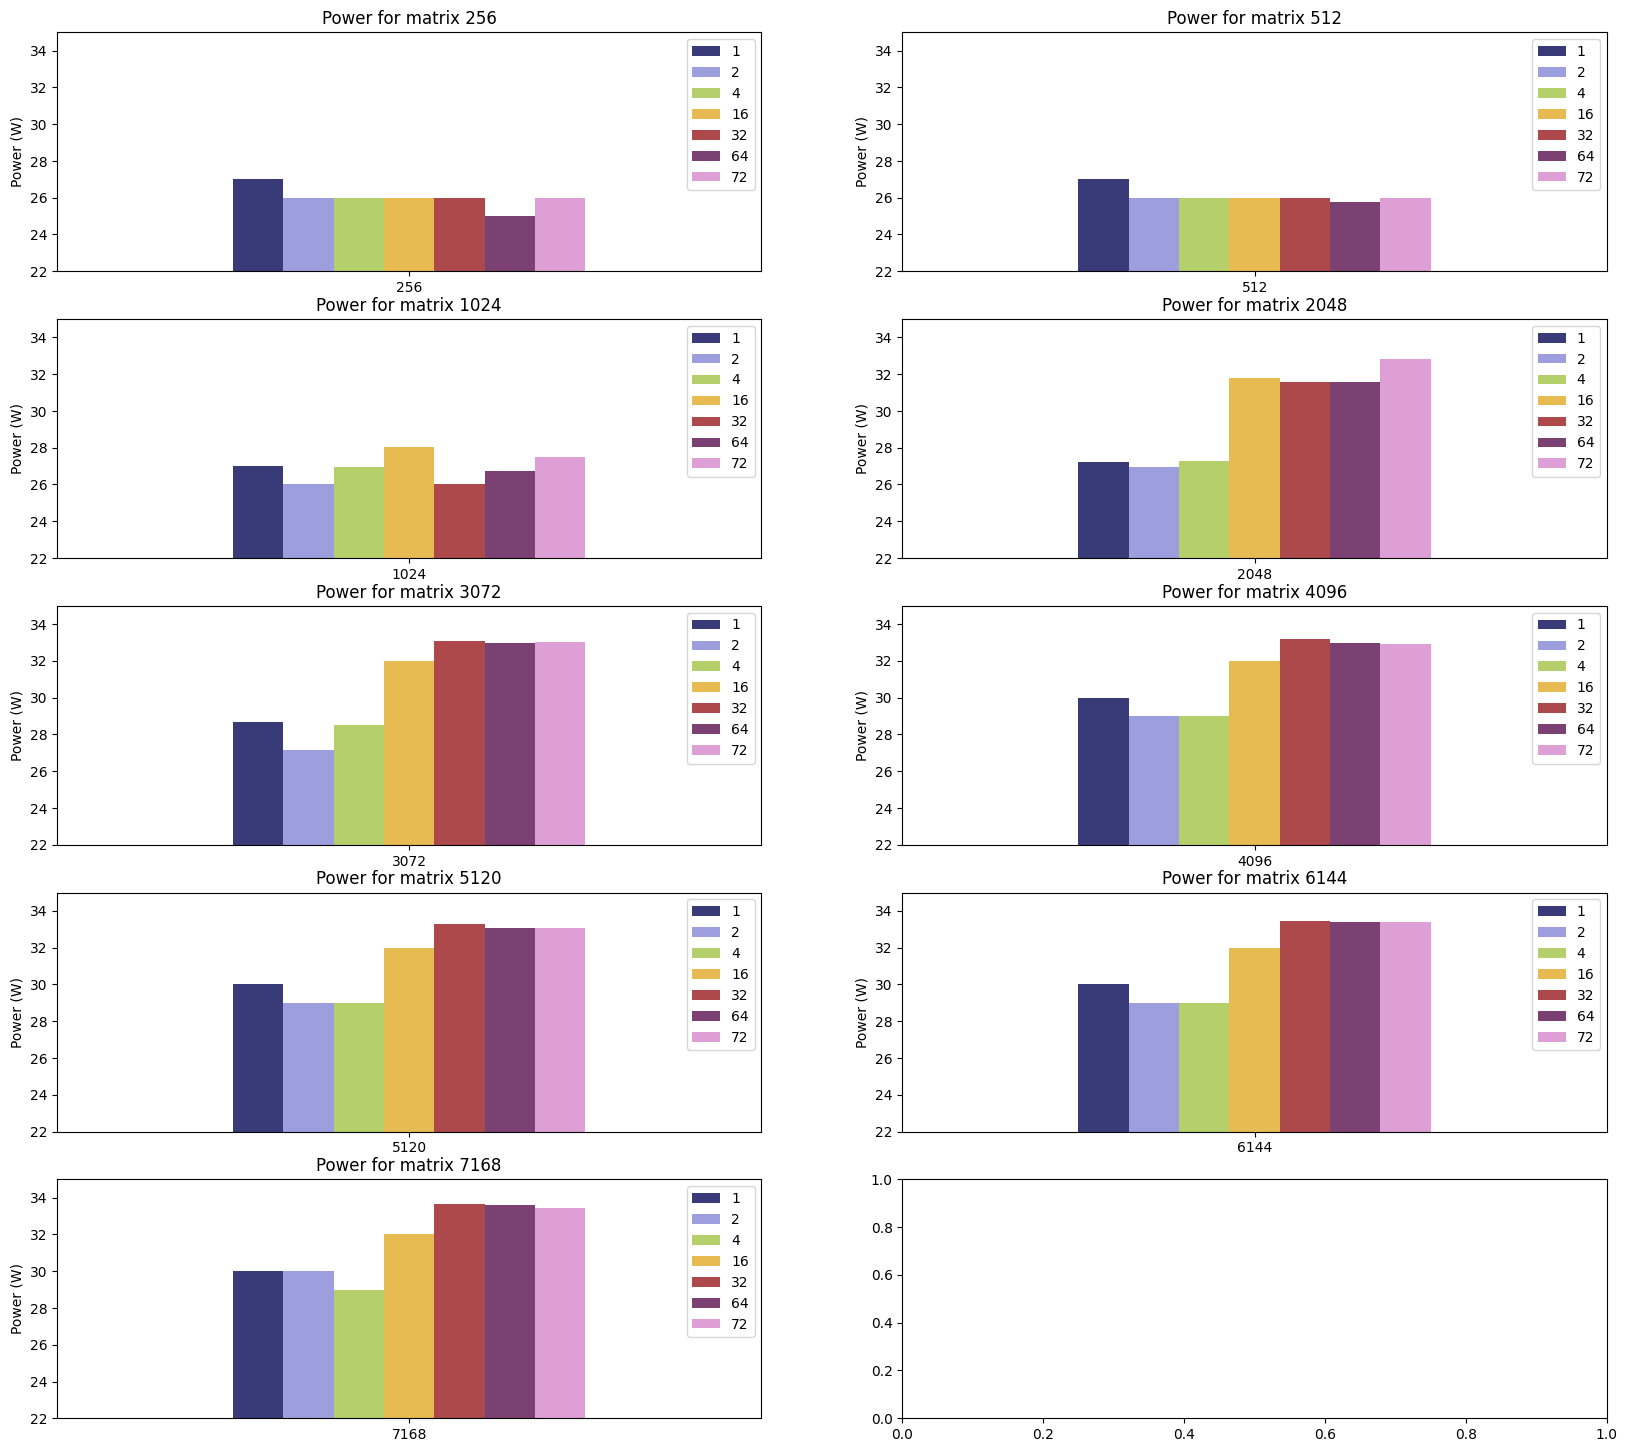

In [153]:
n_rows = int(np.ceil(len(unq_m) / 2))
fig, axs = plt.subplots(n_rows, 2, figsize=(20,18))
i, j = 0, 0
for m in unq_m:
    plot = df_power.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"Power for matrix {m}")
    plot.set_ylabel("Power (W)")
    plot.set_ylim(22,35)
    if j < 1:
        j += 1
    else:
        j = 0
        i += 1

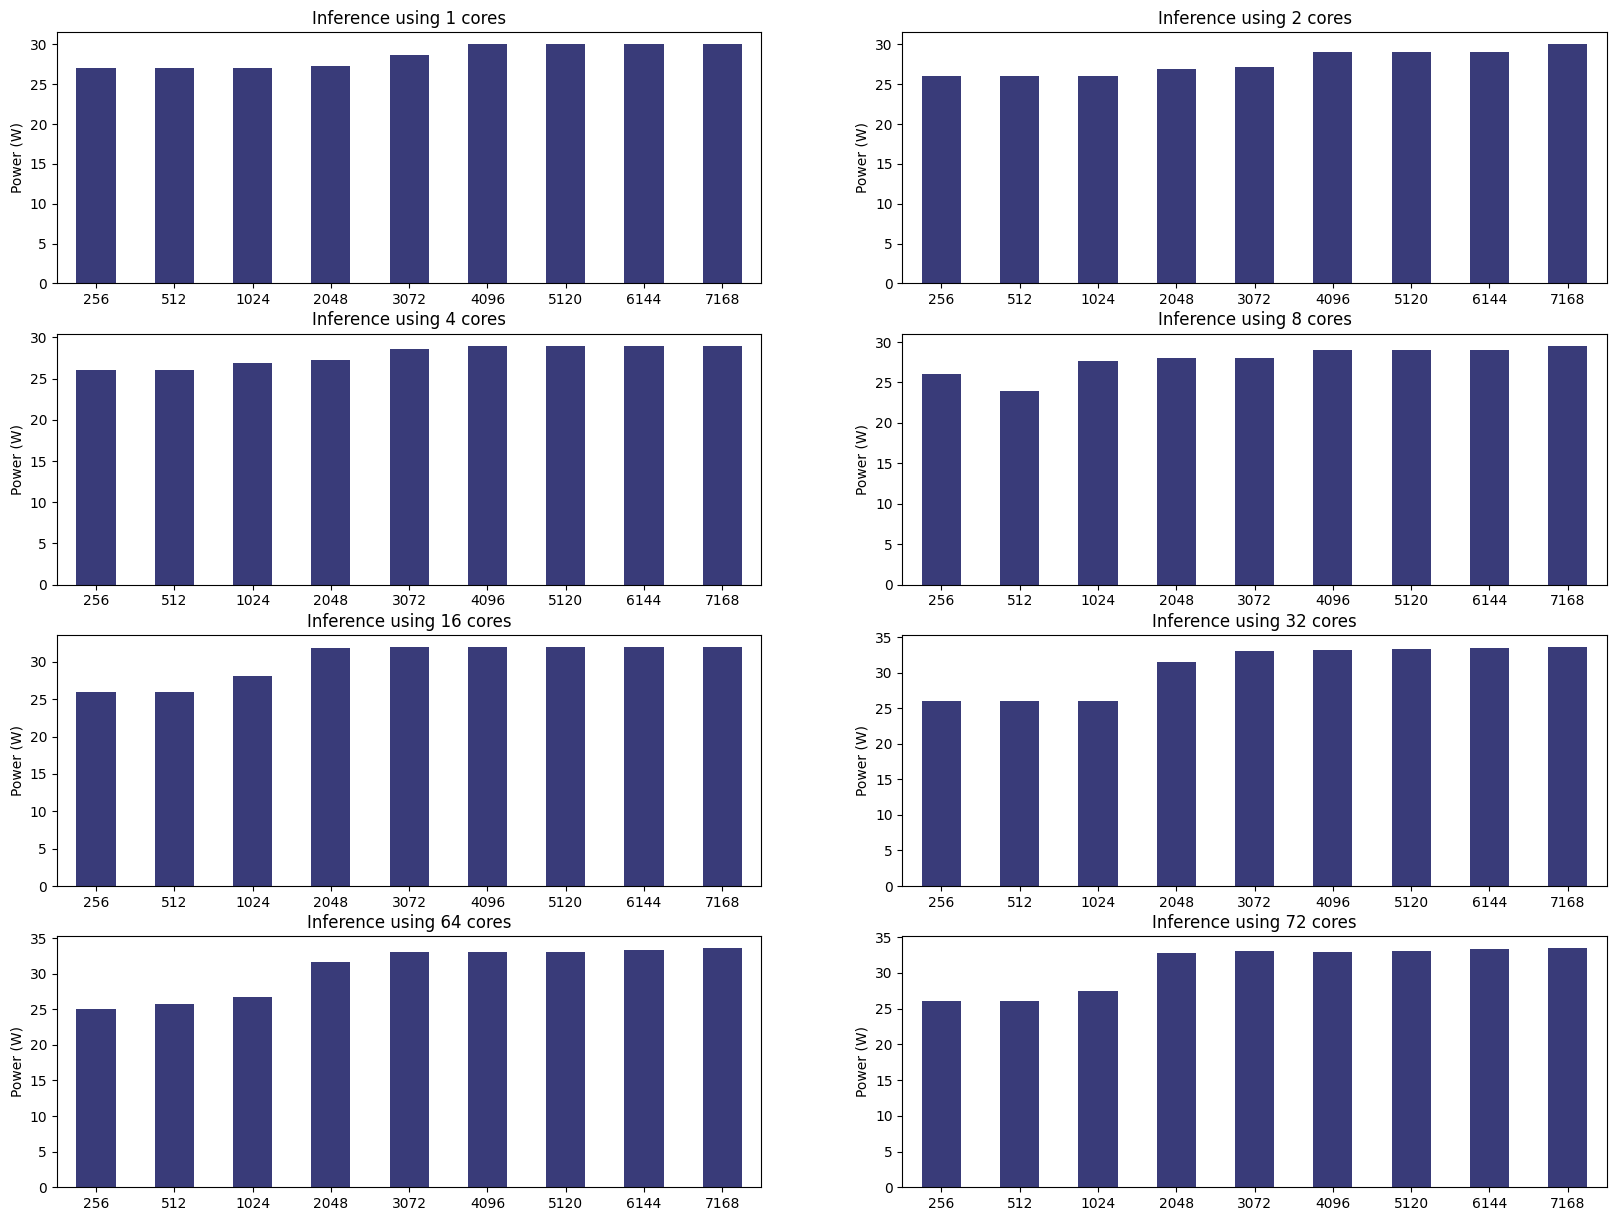

In [149]:
n_rows = int(np.ceil(len(df_power.columns) / 2))
if n_rows == 1:
    n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
i, j = 0, 0
for g in df_power.columns:
    plot = df_power[g].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_ylabel("Power (W)")
    plot.set_title("Inference using " + str(g) + " cores")
    if j < n_cols - 1:
        j += 1
    else:
        j = 0
        i += 1

## GFLOPS per Watt

In [151]:
df_gflops_w = df_inf_flops / df_power 
df_gflops_w

,1,2,4,8,16,32,64,72
256,1.617614,1.684859,3.141317,NaN,2.071121,1.554937,2.301022,3.490847
512,15.029016,10.214988,25.501345,NaN,31.578476,10.906398,33.096883,34.786094
1024,25.656788,40.856546,76.898804,NaN,138.728893,115.238916,184.574698,168.832669
2048,28.310960,56.244168,105.033037,NaN,263.035859,347.917875,464.986226,462.352419
3072,27.599908,57.556786,105.707137,NaN,314.099144,511.071189,719.867249,877.774700
4096,26.656236,54.572053,106.430067,NaN,337.705206,577.566007,933.924432,1098.626726
5120,26.809442,54.921066,107.761756,NaN,354.112929,618.426723,1039.120645,1124.526732
6144,26.874329,55.115649,108.390728,NaN,362.477898,641.565265,1087.820158,1332.898438
7168,26.966387,53.411698,109.054667,NaN,356.704528,631.742320,1146.103807,1399.826665


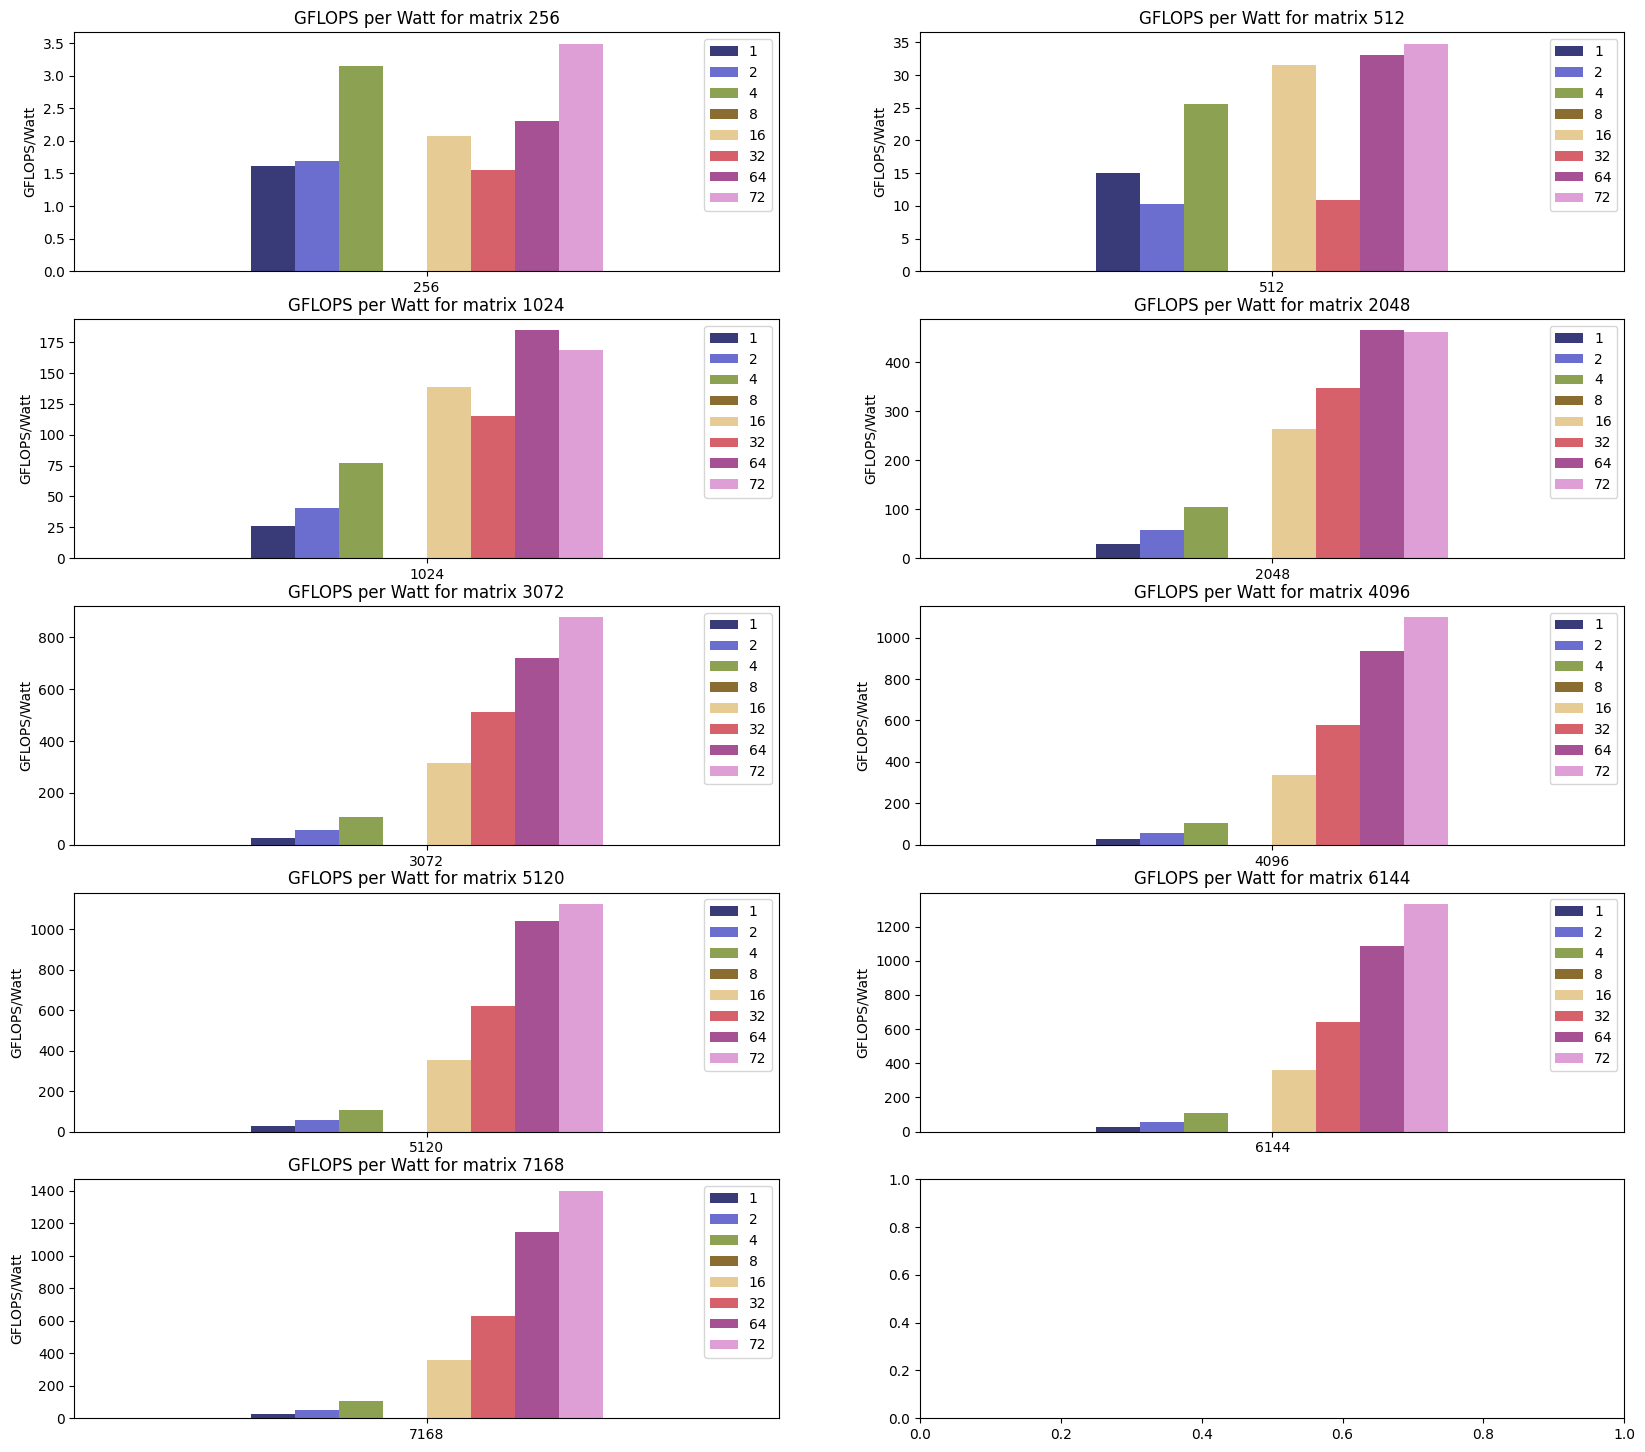

In [152]:
n_rows = int(np.ceil(len(unq_m) / 2))
fig, axs = plt.subplots(n_rows, 2, figsize=(20,18))
i, j = 0, 0
for m in unq_m:
    plot = df_gflops_w.loc[[m]].plot(kind='bar', ax=axs[i][j], colormap="tab20b", rot=0)
    plot.set_title(f"GFLOPS per Watt for matrix {m}")
    plot.set_ylabel("GFLOPS/Watt")
    if j < 1:
        j += 1
    else:
        j = 0
        i += 1